In [1]:
import pandas as pd
import numpy as np

# Read data

In [2]:
missing_values = ['n/a', 'na']
df_train = pd.read_csv('titanic/train.csv', na_values = missing_values)
df_test = pd.read_csv('titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
hist = df_train.hist(bins=20)

# Clean data

In [6]:
def categorical_to_numerical(data_pd):
    data_pd['Sex'] = data_pd['Sex'].map({'male':0, 'female':1})
    data_pd['Embarked'] = data_pd['Embarked'].map({'C':0, 'Q':1, 'S':2})
    
    return data_pd

In [7]:
import pandas.api.types as ptypes

def test_categorical_to_numerical():
    df = pd.DataFrame({"PassengerId": [1, 2, 3],
                       "Sex": ['lala', 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q']}) #,
                       # "hola": ['a', 'b', 'c']})
    
    df_cleaned = categorical_to_numerical(df)
    
    assert all(ptypes.is_numeric_dtype(df_cleaned[col]) for col in df_cleaned)
    # True
    # assert ptypes.is_string_dtype(df_cleaned['c'])
    # True
    # assert ptypes.is_datetime64_any_dtype(df_cleaned['d'])

test_categorical_to_numerical()

In [8]:
def clean_data(data_pd):
    cleaned_data = data_pd.dropna(axis=0)
    
    return cleaned_data

In [9]:
def test_clean_data():
    df = pd.DataFrame({"PassengerId": [1, np.nan, 3],
                       "Sex": [None, 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q'],
                        "hola": ['null', 'b', 'c']})
    
    df_cleaned = clean_data(df)
    assert df_cleaned.isna().any().any() == False

test_clean_data()

In [10]:
df_train = categorical_to_numerical(df_train)
df_test = categorical_to_numerical(df_test)

df_train = clean_data(df_train)

In [11]:
del df_train['Name']
del df_test['Name']
del df_train['Ticket']
del df_test['Ticket']
del df_train['Cabin']
del df_test['Cabin']

# Matriz de correlacion

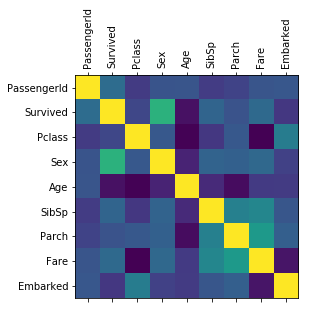

In [12]:
import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
tick_marks = [i for i in range(len(df_train.columns))]
plt.xticks(tick_marks, df_train.columns, rotation='vertical')
plt.yticks(tick_marks, df_train.columns)
plt.show()

In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,1,38.0,1,0,71.2833,0.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
6,7,0,1,0,54.0,0,0,51.8625,2.0
10,11,1,3,1,4.0,1,1,16.7000,2.0
11,12,1,1,1,58.0,0,0,26.5500,2.0
